In [1]:
import math
import hess
import matplotlib.pyplot as plt
import numpy as np
from hess.nets import MaskedNetLinear, SubNetLinear

import hess.net_utils as net_utils
import torch
from torch import nn

In [2]:
torch.random.manual_seed(10)

In [3]:
n_hidden = 5
width = 1024

In [4]:
model = SubNetLinear(2, 1, n_layers=n_hidden, k=width)

In [5]:
hess.net_utils.set_model_prune_rate(model, 0.6)

==> Setting prune rate of network to 0.6
==> Setting prune rate of sequential.0 to 0.6
==> Setting prune rate of sequential.2 to 0.6
==> Setting prune rate of sequential.4 to 0.6
==> Setting prune rate of sequential.6 to 0.6
==> Setting prune rate of sequential.8 to 0.6
==> Setting prune rate of sequential.10 to 0.6
==> Setting prune rate of sequential.12 to 0.6


In [6]:
hess.net_utils.freeze_model_weights(model)

=> Freezing model weights
==> No gradient to sequential.0.weight
==> No gradient to sequential.0.bias
==> No gradient to sequential.2.weight
==> No gradient to sequential.2.bias
==> No gradient to sequential.4.weight
==> No gradient to sequential.4.bias
==> No gradient to sequential.6.weight
==> No gradient to sequential.6.bias
==> No gradient to sequential.8.weight
==> No gradient to sequential.8.bias
==> No gradient to sequential.10.weight
==> No gradient to sequential.10.bias
==> No gradient to sequential.12.weight
==> No gradient to sequential.12.bias


In [7]:
def twospirals(n_points, noise=.5, random_state=920):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -1.5*np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y =  1.5*np.sin(n)*n + np.random.randn(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

In [8]:
X, Y = twospirals(500, noise=1.3)
train_x = torch.FloatTensor(X)
train_y = torch.FloatTensor(Y).unsqueeze(-1)

X, Y = twospirals(100, noise=1.3)
test_x = torch.FloatTensor(X)
test_y = torch.FloatTensor(Y).unsqueeze(-1)


In [20]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_func = torch.nn.BCEWithLogitsLoss()

losses = []
test_losses = []

for step in range(2000):
    optimizer.zero_grad()
    outputs = model(train_x)
    
    loss=loss_func(outputs,train_y)
    trainL = loss.item()
    print("train loss = ", trainL)
    losses.append(trainL)
    loss.backward()
    optimizer.step()
    
    ## compute test loss ##
    outputs = model(test_x)
    testL = loss_func(outputs,test_y).item()
    test_losses.append(testL)
    print("test loss = ", testL)


train loss =  0.6931425929069519
test loss =  0.6502857208251953
train loss =  0.6737584471702576
test loss =  5.133234977722168
train loss =  4.957025051116943
test loss =  0.6018656492233276
train loss =  0.6774828433990479
test loss =  0.6744674444198608
train loss =  0.6836072206497192
test loss =  0.6807196140289307
train loss =  0.6864861845970154
test loss =  0.6776230335235596
train loss =  0.6856857538223267
test loss =  0.6613178253173828
train loss =  0.6798983216285706
test loss =  0.6455889344215393
train loss =  0.6707947850227356
test loss =  0.6258583664894104
train loss =  0.6650000214576721
test loss =  0.6330322623252869
train loss =  0.6638192534446716
test loss =  0.5982105135917664
train loss =  0.6576059460639954
test loss =  0.590639591217041
train loss =  0.6430666446685791
test loss =  0.5753361582756042
train loss =  0.6389486789703369
test loss =  0.5624992251396179
train loss =  0.6418445110321045
test loss =  0.5698652267456055
train loss =  0.638931155204

test loss =  0.5494351387023926
train loss =  0.5721694231033325
test loss =  0.5752130746841431
train loss =  0.593904435634613
test loss =  0.5479551553726196
train loss =  0.5833977460861206
test loss =  0.5405231714248657
train loss =  0.5879326462745667
test loss =  0.5316162705421448
train loss =  0.5912793874740601
test loss =  0.5136508941650391
train loss =  0.5738314390182495
test loss =  0.531268298625946
train loss =  0.5649698376655579
test loss =  0.5554237961769104
train loss =  0.5663016438484192
test loss =  0.5167196989059448
train loss =  0.5396247506141663
test loss =  0.48701363801956177
train loss =  0.5426198840141296
test loss =  0.49473485350608826
train loss =  0.5358808040618896
test loss =  0.5233817100524902
train loss =  0.5260645151138306
test loss =  0.4781360924243927
train loss =  0.5033639669418335
test loss =  0.4747127294540405
train loss =  0.5063955783843994
test loss =  0.4788432717323303
train loss =  0.4912867546081543
test loss =  0.4800631701

train loss =  0.5910089612007141
test loss =  0.5566285848617554
train loss =  0.646308422088623
test loss =  0.5421886444091797
train loss =  0.6236071586608887
test loss =  0.5380390882492065
train loss =  0.5779630541801453
test loss =  0.6742603182792664
train loss =  0.6707055568695068
test loss =  0.6724101901054382
train loss =  0.667874276638031
test loss =  0.6303225755691528
train loss =  0.6459235548973083
test loss =  0.6107009053230286
train loss =  0.6435274481773376
test loss =  0.5977331399917603
train loss =  0.6463221311569214
test loss =  0.5902307033538818
train loss =  0.6453952193260193
test loss =  0.5843055248260498
train loss =  0.6366599798202515
test loss =  0.579455554485321
train loss =  0.6307206749916077
test loss =  0.5838277339935303
train loss =  0.6290671825408936
test loss =  0.5921695232391357
train loss =  0.6359485387802124
test loss =  0.5939235091209412
train loss =  0.6384198665618896
test loss =  0.5877180695533752
train loss =  0.635616540908

KeyboardInterrupt: 

In [ ]:
# losses = [l() for l in losses]

(0.3, 1.0)

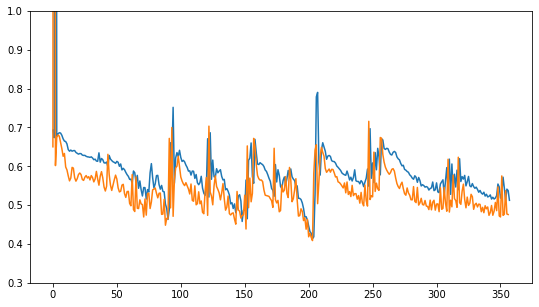

In [24]:
plt.figure(figsize=(9, 5))
plt.plot(losses)
plt.plot(test_losses)
plt.ylim(0.3, 1.)

In [ ]:
buffer = 0.3
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [ ]:
pred = torch.sigmoid(model(in_grid).squeeze().cpu()).reshape(xx.shape)

In [ ]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, pred.detach(), alpha=0.5)
plt.title("Classifier", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)
plt.savefig("./two-spiral-classifier.pdf", bbox_inches="tight")

In [ ]:
pred = torch.sigmoid(model(in_grid).squeeze().cpu()).reshape(xx.shape)